In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


**Importing Data**

Start by importing the data


In [2]:
reviews = pd.read_csv('../input/wine-reviews/winemag-data-130k-v2.csv')

**Initial Analysis**

Now do the intial analysis: get the shape (number of rows and columns) so in this case, there are 129,971 rows and 14 columns.

In [3]:
reviews.shape

(129971, 14)

Another initial step is to get the names of the columns and make sure that they make sense and that all the columns are needed. In this case, most of them are self-explanatory, however, the first column is named "Unnamed: 0", and it is just a row count, so it can be safely dropped. Also, "region_1" and "region_2" are unclear, region_1 is the wine growing area and region_2, which is not always populated gives a more specific region. So I will rename them: general_area and specific_area. 

In [4]:
reviews.columns


Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

**Data Cleaning**
Dropped the row numbers and renamed the two columns.

In [5]:
reviews = reviews.drop(['Unnamed: 0'], axis=1)
reviews = reviews.rename(columns={'region_1': 'general_area', 'region_2':'specific_area'}) 


**Further Initial Analysis**

Now get the data types of each column. This data has 11 object datatype columns and one int column and one float column. The int column is for the points data (scored from 1 to 100, higher is better) and float is for the price of the wine.

In [6]:
reviews.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
general_area              object
specific_area             object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

Now it's time to look at the data, by seeing the first and last 5 records. There are clearly several rows that have missing data, price, general_area and specific_area. 

In [7]:
reviews.head(5)

,country,description,designation,points,price,province,general_area,specific_area,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
reviews.tail(5)

,country,description,designation,points,price,province,general_area,specific_area,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


Finally, run info to how many null values exist in the dataset.  From above, there are 129971 rows, so the only columns that don't have any nulls are: description, points, title and winery. 

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
general_area             108724 non-null object
specific_area            50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


**Numerical Statistical Analysis**

Now, let's look at the stastical analysis to get more information about the data. So the two numeric columns are the only ones that are analyzed.
points:
* mean: 88.44
* standard deviation: 3.04 
* min: 80
* max: 100

price:
* mean: 83.36
* standard deviation: 41.02
* min: 4
* max: 3300


The data above shows that the point values are less variable (much smaller standard deviation) than price. This makes sense because the points awarded in this dataset are only between 80 and 100, while price can go from 4 USD to 3300 USD. 

The median is represented by the 50% value. The difference between mean and median is that mean is the average value, while the median is the middle value. Having these two values can tell you more about the distribution of the dataset and can indicate if the mean is being pulled higher or lower based on very high or very low values. In this case, the mean price (35.36) is higher than the median, which is 25. Looking at the values from the review.describe() run above, there is at least one huge value (3300) that will cause the mean to be higher (so skews the data to the right). 75% of the price values are 42 and below, so adding in a value like 3300 will definitely cause the average to go up.

In the case of points, however, the mean is 88.45 and the median is 88, so this data distribution seems to be more normally distributed.


In [10]:
reviews.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


Let's see if this is right by looking at a histogram of the values.And from what is returned, that inital analysis is exactly right. The values for points are much closer to a normal distribution than price. But now I want to see what those top values look like. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f414e2f2358>,
      dtype=object)

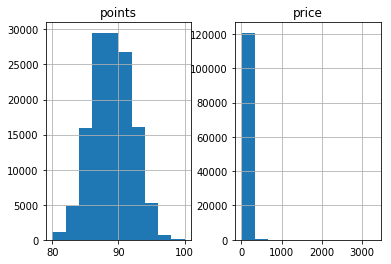

In [11]:
reviews.hist()

To see the highest prices, I will sort by price, then look at the top 5 to get a feel for how many very high priced bottles there are. And the result is that there are 5 bottles that are 2000 dollars or higher. 

In [12]:
reviews.sort_values('price', ascending = False).head(5)

,country,description,designation,points,price,province,general_area,specific_area,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
98380,France,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair
113564,France,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair


Since I saw the top 5 prices are very high, I'm curious to see how many prices are greater than the top 75% percentile (42). That answer is 29,703. Taking 29,703 / 129971 (which is the total number of values) shows 22% of them are above the 75th percentile. But I'd like more details about these high prices. 


In [13]:
price = reviews['price']
np.sum(price>42)

29703

I will start with how many bottles are over 100 dollars. So approximately 90% of the bottles over the price of 42, are under 100. Furthermore, 3,366 represents 2.6% of the total dataset. To illustate this, I'll take the histogram of the top values (over 42) to see it visually.

In [14]:
np.sum(price>100)


3366

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f414e19bc18>,
      dtype=object)

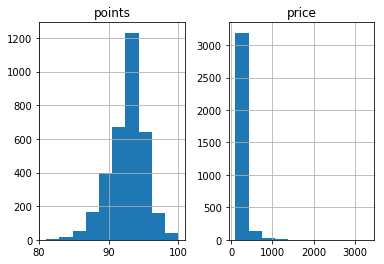

In [15]:

over100 = reviews[reviews['price']>100]
over100.hist()

From the histogram above, it is obvious that most of the bottles (over 3000 out of 3306) are well below 1000. Also, note that the histogram of points has moved to the right, most of the values are over 90, so this shows these highest priced wines are higher ranked as well. Now I'll see how prices greater than 500 fare.

In [16]:
np.sum(price>500)

91

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f414e055828>,
      dtype=object)

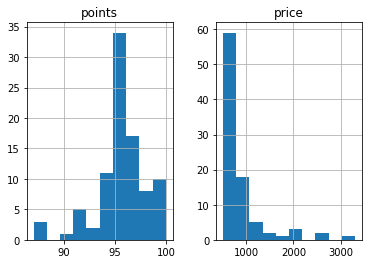

In [17]:
over500 = reviews[reviews['price']>500]
over500.hist()

At over 500 dollars (see histograms above), most of the bottles (almost 80 out of 90) are less than or equal to 1000. Also, the vast majority of points are over 95. So based on the ratings, spending 500 dollars or more will most often result in a better wine. Finally I'll look at over 1000.

In [18]:
np.sum(price>1000)

14

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f414dfa99b0>,
      dtype=object)

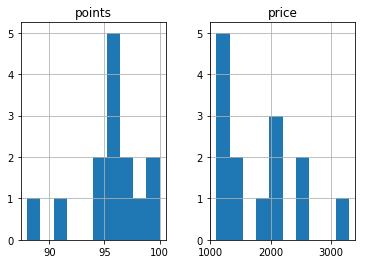

In [19]:
over1000 = reviews[reviews['price']>1000]
over1000.hist()

**Number of wines over 100**

In [20]:
np.sum(price>100)

3366

Now I will check the wine priced over 10, but under 100

In [21]:
#bet10_100 = (reviews[reviews['price']>=10]) & (reviews[reviews['price']<=100])
bet10_100 = reviews.query('10 < price < 100')

**Get the number of bottles between 10 and 100 (inclusive)**

In [22]:
np.sum(price<=100) - np.sum(price<=10)

111329

Now to get the averages for the bottles between 10 and 100. However, if you try to run it as bet10_100.mean() it will run very, very slowly due to all the object datatypes, instead us the _get_numeric_data() 

In [23]:
#bet10_100.mean()
bet10_100._get_numeric_data().mean()

points    88.462418
price     31.964386
dtype: float64

I will also check the cheapest wines, under 10 (but excluding blanks).

In [24]:
under10 = reviews[reviews['price'].notnull()]
under10 = under10[under10['price']<10]


In [25]:
np.sum(price < 10)

2841

Now look at correlations, which will again only be for the numeric columns. Price and points are weakly correlated. The correlation being weak may be due to the very large price outliers.

In [26]:
reviews.corr()

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


I'll check the means at different price values: over100, over500, over1000 to see how much better the wine is rated as price goes up. Interestingly, the mean points peak at over 500, and actually go down for over 1000.

In [27]:
under10.mean()

points    84.763464
price      8.170363
dtype: float64

In [28]:
over100.mean()

points     92.820559
price     184.824718
dtype: float64

In [29]:
over500.mean()

points     95.681319
price     854.186813
dtype: float64

In [30]:
over1000.mean()

points      95.642857
price     1788.428571
dtype: float64

Now I'd like to see how the wines perform by country. First, I'll start by getting the list of countries. 

In [31]:
coNames = reviews[reviews['country'].notnull()]
uniqueCoNames = coNames.country.unique()
print(uniqueCoNames)

['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' 'Turkey' 'Czech Republic' 'Slovenia'
 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon' 'Serbia'
 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus' 'Armenia'
 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia' 'Macedonia'
 'China' 'Egypt']


See how many countries are represented in these reviews

In [32]:
len(reviews['country'].unique())

44

See how many bottles are from each country

In [33]:
coNames.country.value_counts()


US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

Now get the percentage of each country of the total wine reviews. So 41.96% of the reviews are of US wines, and 17% of the reviews are of French wines, and so forth.

In [34]:
coNames.country.value_counts('country')

US                        0.419558
France                    0.170067
Italy                     0.150414
Spain                     0.051152
Portugal                  0.043808
Chile                     0.034424
Argentina                 0.029251
Austria                   0.025749
Australia                 0.017928
Germany                   0.016666
New Zealand               0.010923
South Africa              0.010785
Israel                    0.003887
Greece                    0.003587
Canada                    0.001978
Hungary                   0.001124
Bulgaria                  0.001085
Romania                   0.000924
Uruguay                   0.000839
Turkey                    0.000693
Slovenia                  0.000670
Georgia                   0.000662
England                   0.000570
Croatia                   0.000562
Mexico                    0.000539
Moldova                   0.000454
Brazil                    0.000400
Lebanon                   0.000269
Morocco             

I'd like to see which countries have the top 10 highest mean point value - the answers are surprising!

In [35]:
reviews.groupby('country')['points'].mean().sort_values(ascending=False)[:10]

country
England       91.581081
India         90.222222
Austria       90.101345
Germany       89.851732
Canada        89.369650
Hungary       89.191781
China         89.000000
France        88.845109
Luxembourg    88.666667
Australia     88.580507
Name: points, dtype: float64

I want to investigate the wines from England and India to learn more about why their point values are so high. First I want to see how many wines there are.

In [36]:
india = reviews[reviews.country == 'India']
india.country.count()

9

In [37]:
england = reviews[reviews.country == 'England']
england.country.count()

74

In [38]:
england.mean()

points    91.581081
price     51.681159
dtype: float64

In [39]:
india.mean()

points    90.222222
price     13.333333
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f414dde9be0>,
      dtype=object)

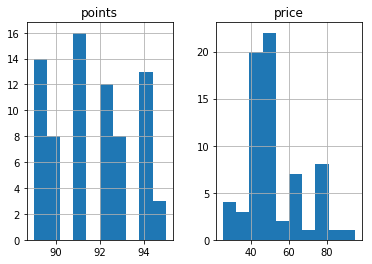

In [40]:
england.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f414dd2b908>,
      dtype=object)

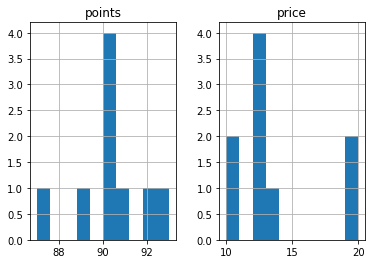

In [41]:
india.hist()

In [42]:
england.taster_name.unique()

array(['Anne Krebiehl\xa0MW'], dtype=object)

In [43]:
india.taster_name.unique()

array(['Mike DeSimone'], dtype=object)

The top two countries for points have 74 wines for England and 9 wines for India. Each country only had reviews from one person. Now I'll look at Austria, which is ranked number 3. It has 3,345 wines with two reviewers.

In [44]:
austria = reviews[reviews.country == 'Austria']
austria.taster_name.unique()

array(['Anne Krebiehl\xa0MW', 'Roger Voss', nan], dtype=object)

In [45]:
austria.country.count()

3345

I'm also curious in the bottom 10 countries

In [46]:
reviews.groupby('country')['points'].mean().sort_values()[:10]

country
Peru                      83.562500
Egypt                     84.000000
Ukraine                   84.071429
Brazil                    84.673077
Mexico                    85.257143
Romania                   86.400000
Chile                     86.493515
Bosnia and Herzegovina    86.500000
Argentina                 86.710263
Uruguay                   86.752294
Name: points, dtype: float64

In [47]:
uruguay = reviews[reviews.country == 'Uruguay']
uruguay.taster_name.unique()

array(['Michael Schachner'], dtype=object)

In [48]:
uruguay.country.count()

109

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f414cf200f0>,
      dtype=object)

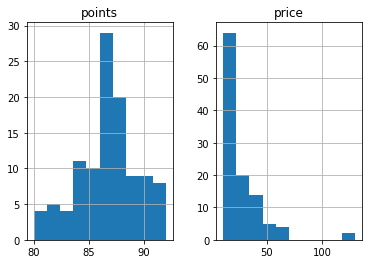

In [49]:
uruguay.hist()

In [50]:
argentina = reviews[reviews.country == 'Argentina']
argentina.taster_name.unique()

array(['Michael Schachner', nan], dtype=object)

In [51]:
argentina.country.count()

3800

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f414ce5fdd8>,
      dtype=object)

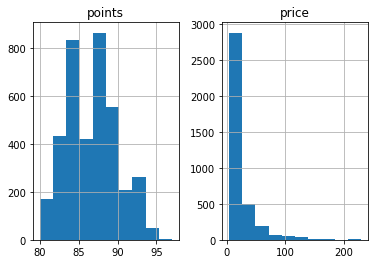

In [52]:
argentina.hist()

### Conclusions
Mean point value is 88, and mean price is 83
The price is skewwed due to a $3300 bottle, while most of the otehrs are under well under $100 (75% of the wine is less than $43)

There are 14 wines that are priced over 1000, the average price is $1788.43, and the average points are 95.64. There are 91 wines that are over $500, with the average price being $854.19 and the average point value is 95.68. 
There are 3,366 wines that are over 100, and the average price is $184.82 and the average number of points awarded is 92.82.
Between 10 and 100 (inclusive), there are 111,329 reviewed wines priced in that range. The average price is  
Finally, there are 2,841 wines under $10, and the average price is $8.17 and the average number of points is 84.76. 

There are 44 countries represented in the surveys, and 42 percent of the reviews are of US wines, 17 percent are from France, and 15 percent of the wines reviewed are from Italy, Spain and Portugla round out the top 5. 
This highest rated countries are England, India, Austria, Germany, and Canada. However, the share of reviews from these countries is very small: Austria (3,345 wines, 2.5 percent), Germany (1.6 percent), Canada (.19 percent), England (74 wines, 0.05 percent), and India (9 wines, 0.007 percent), so theses high ratings may be desceptive.
Also, India and England only had one reviewer for all of their wines, while Austria has two reviewers for all of their wines. 
The lowerst rated countries are: Romania, Chile, Bosnia and Herzegovina, Argentina and Uruguay. Uruguay had 109 wines reviewed, and all by the same reviewer. Argentina also only had one reviewer, and had 3,800 wines reviewed.
So overall, there are not many unique reviewers so this is definitely a bias in the ratings. If only one person is reviewing (or two), it is impossible to reach a thorough consensus.